In [1]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt 
import math

## Question 1

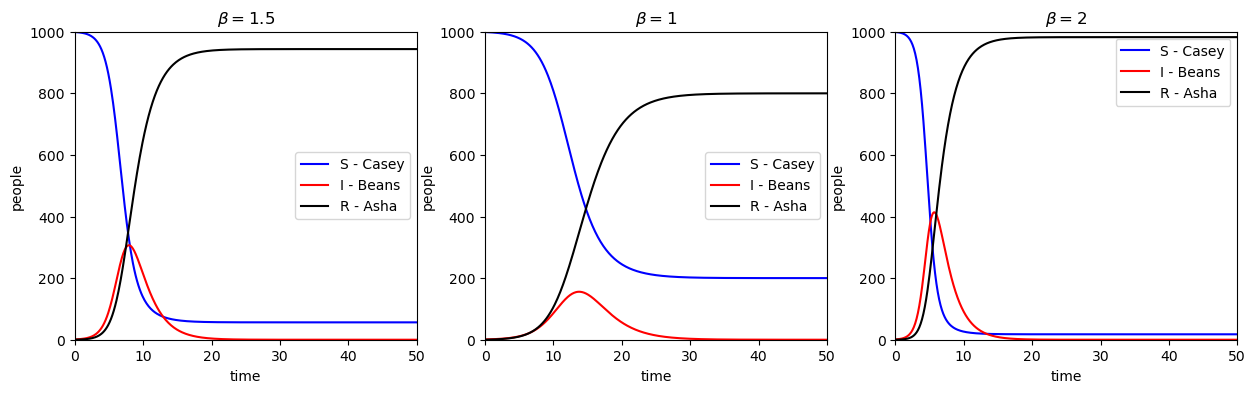

In [23]:
tvals = np.arange(start=0,stop=50,step=0.1)
S0 = 999; I0 = 1; R0 = 0;
gamma = 0.5;
betas = [1.5,1,2]

fig,[ax0,ax1,ax2] = plt.subplots(1,3,figsize=(15,4))

for ii,beta in enumerate(betas):
    ax_name = "ax"+str(ii)
    ax = globals()[ax_name]
    S,I,R = SIR_solver(S0,I0,R0,beta,gamma,tvals)

    Sus ,= ax.plot(tvals,S,c="b")
    Inf ,= ax.plot(tvals,I,c="r")
    Rec ,= ax.plot(tvals,R,c="k")
    ax.set_ylim([0,S0+I0+R0]); ax.set_xlim([0,50])
    ax.set_ylabel("people"); ax.set_xlabel("time")
    ax.legend([Sus,Inf,Rec],["S - Casey", "I - Beans", "R - Asha"])
    ax.set_title(r"$\beta = ${}".format(beta))
plt.show()

## Question 3b

In [26]:
from scipy.optimize import fsolve

[3.33066907e-16]
[6.76925438e-09]
[0.17613414]
[0.31369833]


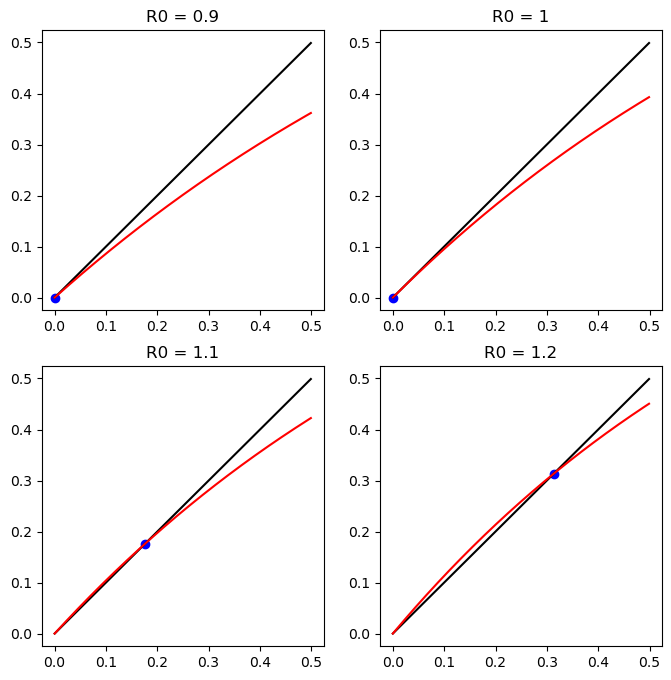

In [48]:
# define functions 
f = lambda r_inf: r_inf
g = lambda r_inf, R0: 1 - math.exp(-R0*r_inf)
h = lambda r_inf, R0: f(r_inf) - g(r_inf,R0)

# iterate through R0 values 
R_naughts = [0.9,1,1.1,1.2]
r_infs = np.arange(0,0.5,0.001)

fig,[[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(8,8))
for ii,R0 in enumerate(R_naughts):
    ax_name = "ax"+str(ii)
    ax = globals()[ax_name]
    
    root = fsolve(h,1,args=(R0))
    print(root)
    fs = [f(r_inf) for r_inf in r_infs]
    gs = [g(r_inf,R0) for r_inf in r_infs]

    ax.plot(r_infs,fs,c='k')
    ax.plot(r_infs,gs,c='r')
    ax.scatter(root[0],f(root[0]),c='b')
#     ax.set_ylabel("people"); ax.set_xlabel("time")
    ax.set_title("R0 = {}".format(R0))
plt.show()

## Question 3c

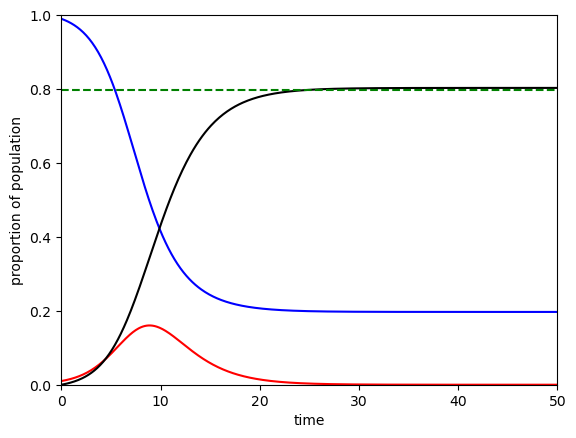

In [54]:
beta = 1; gamma = 0.5;
R0 = beta/gamma
Sinit = 0.99; Iinit = 0.01; Rinit = 0;

root = fsolve(h,1,args=(R0))
S,I,R = SIR_solver(Sinit,Iinit,Rinit,beta,gamma,tvals)

fig,ax = plt.subplots()
Sus ,= ax.plot(tvals,S,c="b")
Inf ,= ax.plot(tvals,I,c="r")
Rec ,= ax.plot(tvals,R,c="k")
ax.plot([0,50],[root[0],root[0]],c="g",linestyle="dashed")
ax.set_ylim([0,1]); ax.set_xlim([0,50])
ax.set_ylabel("proportion of population"); ax.set_xlabel("time")
#ax.set_title(r"$\beta = ${}".format(beta))
plt.show()